# Importing Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, r2_score
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Data Reading

In [2]:
# Load the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/selvinfurtado01/schulich_predictive_modeling/refs/heads/main/dataset_lm.csv')

In [3]:
dataset.head(10)

,Dependent Var,Explanatory Var #1,Explanatory Var #2,Explanatory Var #3,Explanatory Var #4,Explanatory Var #5,Explanatory Var #6,Explanatory Var #7,Explanatory Var #8,Explanatory Var #9,Explanatory Var #10,Explanatory Var #11,Explanatory Var #12,Explanatory Var #13,Explanatory Var #14,Explanatory Var #15
0,56.293458,13.698667,50.639873,0,-18.568035,45.121911,11.412501,56.410757,2,-12.281132,38.996909,-3.010548,49.195073,0,-21.153143,46.919314
1,58.473431,2.714725,65.845845,1,-25.105932,47.190213,10.080280,65.383107,3,-36.763585,51.654939,4.991111,45.591729,0,-6.474403,53.383508
2,94.195330,11.618072,65.072497,0,-7.897464,52.163036,11.057301,82.812717,0,-15.733547,48.913837,-2.457696,56.608806,0,-27.903299,48.515026
3,29.074583,0.818623,45.408996,1,-18.316132,54.356714,5.029029,48.812471,1,-12.825591,45.851732,14.974177,47.362594,1,-10.064411,55.266254
4,86.035569,9.077544,73.548021,0,-19.204165,47.186807,12.128134,62.520911,2,-13.804860,47.765904,9.593982,53.700562,0,-17.546302,48.150543
5,59.313030,-1.625179,74.795225,0,-27.917682,43.443319,6.971366,78.497117,0,-38.808025,52.181380,16.974969,58.124156,1,-9.023169,55.840461
6,43.302299,17.177045,49.674376,1,-23.490245,58.160871,15.996831,49.845730,3,-24.849489,51.781663,8.667649,72.365524,0,-22.942562,49.120537
7,25.919500,-3.606102,52.838652,0,-20.780413,52.866009,23.282374,68.007436,0,-24.574748,54.423094,8.551908,53.560828,1,-6.769081,48.255181
8,30.353577,4.052598,45.221950,1,-23.692647,44.708397,19.821684,73.394895,3,-28.983295,57.622157,14.581353,55.468061,0,-13.611744,57.230137
9,51.590542,9.369535,55.801956,1,-26.457209,42.325602,-2.058181,74.935838,3,-28.052593,44.794664,2.789562,55.077621,1,-20.948876,55.317270


# Data Cleaning

In [4]:
# Checking the data types of the variables
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dependent Var        422 non-null    float64
 1   Explanatory Var #1   422 non-null    float64
 2   Explanatory Var #2   422 non-null    float64
 3   Explanatory Var #3   422 non-null    int64  
 4   Explanatory Var #4   422 non-null    float64
 5   Explanatory Var #5   422 non-null    float64
 6   Explanatory Var #6   422 non-null    float64
 7   Explanatory Var #7   422 non-null    float64
 8   Explanatory Var #8   422 non-null    int64  
 9   Explanatory Var #9   422 non-null    float64
 10  Explanatory Var #10  422 non-null    float64
 11  Explanatory Var #11  422 non-null    float64
 12  Explanatory Var #12  422 non-null    float64
 13  Explanatory Var #13  422 non-null    int64  
 14  Explanatory Var #14  422 non-null    float64
 15  Explanatory Var #15  422 non-null    flo

In [5]:
# Describing the data to better understand the values
dataset.describe()

,Dependent Var,Explanatory Var #1,Explanatory Var #2,Explanatory Var #3,Explanatory Var #4,Explanatory Var #5,Explanatory Var #6,Explanatory Var #7,Explanatory Var #8,Explanatory Var #9,Explanatory Var #10,Explanatory Var #11,Explanatory Var #12,Explanatory Var #13,Explanatory Var #14,Explanatory Var #15
count,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,67.838396,7.762058,59.725134,0.500000,-16.078411,50.133715,10.420808,61.887309,1.566351,-24.511691,49.728665,7.740874,60.765794,0.500000,-16.673762,50.066901
std,25.676960,7.013243,9.579112,0.500593,8.111197,6.975674,11.520725,14.819969,1.115260,8.500500,6.910690,7.102714,9.525835,0.500593,8.106466,6.794584
min,-2.997183,-4.832834,44.124858,0.000000,-29.774797,30.009511,-9.828552,34.093154,0.000000,-39.979696,26.436407,-4.949728,44.158200,0.000000,-29.750628,32.118882
25%,49.482037,1.720182,51.617692,0.000000,-23.792637,45.423422,-0.174835,49.952772,1.000000,-32.037707,45.283603,1.838210,52.849792,0.000000,-23.797763,45.825931
50%,66.780110,7.905455,59.735139,0.500000,-15.875481,50.093602,10.422513,62.554591,2.000000,-23.767548,49.842746,8.055297,60.773906,0.500000,-17.373619,50.038667
75%,86.801496,13.684104,67.870073,1.000000,-9.185191,54.896583,21.059713,74.441216,3.000000,-17.419390,54.576381,14.020396,69.262757,1.000000,-9.627544,54.962602
max,133.384795,19.973331,76.973576,1.000000,-2.060708,70.365951,29.994610,86.895006,3.000000,-10.129522,68.201681,19.992891,76.639179,1.000000,-2.003168,69.147818


In [6]:
# Checking for null values in the dataset
dataset.isna().sum()

Dependent Var          0
Explanatory Var #1     0
Explanatory Var #2     0
Explanatory Var #3     0
Explanatory Var #4     0
Explanatory Var #5     0
Explanatory Var #6     0
Explanatory Var #7     0
Explanatory Var #8     0
Explanatory Var #9     0
Explanatory Var #10    0
Explanatory Var #11    0
Explanatory Var #12    0
Explanatory Var #13    0
Explanatory Var #14    0
Explanatory Var #15    0
dtype: int64

# Part A: OLS Model

## Define Input and Output Variables

In [7]:
# Assuming 'Dependent Var' is the dependent variable and the others are explanatory variables
X = dataset.drop(columns=['Dependent Var'])  # Explanatory variables
y = dataset['Dependent Var']  # Dependent variable


In [8]:
X = sm.add_constant(X)

## Build OLS Model

In [9]:
model = sm.OLS(y, X)
results = model.fit()

In [10]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Dependent Var   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.504e+30
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:27:47   Log-Likelihood:                 12229.
No. Observations:                 422   AIC:                        -2.443e+04
Df Residuals:                     406   BIC:                        -2.436e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  32.0000   5

# Part B: GLS Model

## Define Residuals 
### Calculating Error Terms, Mean, Standard Deviation and Auto Correlated Terms (First 3 Lags)

In [11]:
# Residuals
residuals = results.resid
residuals

0     -7.105427e-15
1      2.131628e-14
2      7.105427e-14
3      4.618528e-14
4      7.105427e-14
           ...     
417    2.131628e-14
418    1.314504e-13
419    3.552714e-14
420    1.421085e-13
421    7.105427e-14
Length: 422, dtype: float64

In [12]:
# Calculate the standard deviation for the first three lags
std_dev1 = np.std(residuals[1:])
std_dev2 = np.std(residuals[2:])
std_dev3 = np.std(residuals[3:])

print(f'Standard Deviation Lag 1: {std_dev1}')
print(f'Standard Deviation Lag 2: {std_dev2}')
print(f'Standard Deviation Lag 3: {std_dev3}')

Standard Deviation Lag 1: 4.9551815175086424e-14
Standard Deviation Lag 2: 4.9603407113037933e-14
Standard Deviation Lag 3: 4.9637583903042517e-14


In [13]:
# Set parameters 

# OLS assumes mean of error terms to be 0
mu = 0  
print(f'Mean: {mu}')

# Standard deviation of error terms 
sigma = np.std(residuals, axis=0)
print(f'Standard Deviation: {sigma}')

# Calculate autocorrelation for the first three lags
autocorr1 = np.corrcoef(residuals[:-1], residuals[1:])[0, 1]
autocorr2 = np.corrcoef(residuals[:-2], residuals[2:])[0, 1]
autocorr3 = np.corrcoef(residuals[:-3], residuals[3:])[0, 1]

print(f'Autocorrelation Lag 1: {autocorr1}')
print(f'Autocorrelation Lag 1: {autocorr2}')
print(f'Autocorrelation Lag 1: {autocorr3}')

Mean: 0
Standard Deviation: 4.9543398362151284e-14
Autocorrelation Lag 1: 0.09437802856100475
Autocorrelation Lag 1: 0.05387815915020535
Autocorrelation Lag 1: 0.0318742029134076


## Build GLS Model

In [14]:
# Defining the weights for the GLS Model
n = len(residuals)
weights = np.zeros((n, n))

# Diagonal elements of the matrix
for i in range(n):
    weights[i, i] = 1 / (sigma**2)

# Using autocorrelated terms to fill the weights matrix
for i in range(1, n):
    weights[i, i - 1] = -autocorr1 / (sigma**2)  
    weights[i - 1, i] = -autocorr1 / (sigma**2)  

for i in range(2, n):
    weights[i, i - 2] = -autocorr2 / (sigma**2)  
    weights[i - 2, i] = -autocorr2 / (sigma**2)  

for i in range(3, n):
    weights[i, i - 3] = -autocorr3 / (sigma**2)  
    weights[i - 3, i] = -autocorr3 / (sigma**2) 

# Checking if the values are positive in the weights matrix
weights = np.linalg.inv(weights)

In [15]:
weights

array([[2.49179000e-027, 2.58420660e-028, 1.71452451e-028, ...,
        1.79121775e-184, 7.47891807e-185, 3.02681838e-185],
       [2.58420660e-028, 2.51859051e-027, 2.76201795e-028, ...,
        4.42589186e-184, 1.84795414e-184, 7.47891807e-185],
       [1.71452451e-028, 2.76201795e-028, 2.53038763e-027, ...,
        1.06001109e-183, 4.42589186e-184, 1.79121775e-184],
       ...,
       [1.79121775e-184, 4.42589186e-184, 1.06001109e-183, ...,
        2.53038763e-027, 2.76201795e-028, 1.71452451e-028],
       [7.47891807e-185, 1.84795414e-184, 4.42589186e-184, ...,
        2.76201795e-028, 2.51859051e-027, 2.58420660e-028],
       [3.02681838e-185, 7.47891807e-185, 1.79121775e-184, ...,
        1.71452451e-028, 2.58420660e-028, 2.49179000e-027]])

In [16]:
print(weights.shape)
print(len(y))

(422, 422)
422


In [17]:
# GLS Model
x_updated = sm.add_constant(X)
gls_model = sm.GLS(y, x_updated, weights)
gls_results = gls_model.fit()

# Model summary
print(gls_results.summary())

                            GLS Regression Results                            
Dep. Variable:          Dependent Var   R-squared:                       1.000
Model:                            GLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.711e+29
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:27:47   Log-Likelihood:                 11901.
No. Observations:                 422   AIC:                        -2.377e+04
Df Residuals:                     406   BIC:                        -2.370e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  32.0000   1

# Part C: Lasso Model

## Split the Dataset
### Test Size = 0.5

In [18]:
# Split the dataset into training and testing sets (50% training, 50% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

## Run the Lasso Model
### Model with alpha = 1, Estimate Coefficients and Calculate MAPE

In [ ]:
# Running Lasso model with alpha=1
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1)

In [20]:
lasso_model.coef_

array([ 0.        ,  1.26972628,  1.68394638,  2.02626245,  2.08756512,
       -0.91746375, -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.01314162,  0.        , -0.        ,  0.        ,
       -0.03617731])

In [21]:
# Predicting and calculating MAPE for Lasso
y_pred_lasso = lasso_model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_pred_lasso)
print(f'Lasso MAPE with alpha=1: {mape}')

Lasso MAPE with alpha=1: 0.04432190198291579


## Minimize MAPE
### Approximate value for alpha that minimizes the MAPE

In [22]:
#Finding an approximate alpha that minimizes MAPE
alphas = np.logspace(-3, 1, 50) #default for num is 50.
best_alpha = 1
best_mape = mape

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_test)
    current_mape = mean_absolute_percentage_error(y_test, y_pred)
    
    if current_mape < best_mape:
        best_mape = current_mape
        best_alpha = alpha

print(f"Best alpha: {best_alpha}, Best MAPE: {best_mape}")

Best alpha: 0.001, Best MAPE: 4.412831807421888e-05


# Part D: Forecasting on Demand Data

## OLS / AR Model

In [23]:
# Load the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/selvinfurtado01/schulich_predictive_modeling/refs/heads/main/pd_demand.csv')

In [24]:
# Prepare the data by adding a lagged demand column
dataset['Lagged Demand'] = dataset['Demand'].shift(1)
dataset.dropna(inplace=True)

# Vector Y: Demand values from month 2 to month 25
Y = dataset['Demand'].iloc[1:25].values

# Vector X: Lagged Demand values from month 1 to month 24
X = dataset['Lagged Demand'].iloc[1:25].values

In [25]:
# Reshape X to be a 2D array
X = X.reshape(-1, 1)

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [26]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Define the objective function to minimize (Sum of Squared Errors)
def objective(beta, X, Y):
    return np.sum((Y - X @ beta)**2)


In [28]:
# Initial guess for beta (OLS)
beta_init = np.zeros(X_train_scaled.shape[1])

In [29]:
# Solving for beta without any constraints
result_no_constraints = minimize(objective, beta_init, args=(X_train_scaled, y_train))

# Getting the optimized beta coefficients
beta_optimized_no_constraints = result_no_constraints.x

In [30]:
# Predicting future demand using optimized beta
y_pred_ols_no_constraints = X_test_scaled @ beta_optimized_no_constraints

# Display results
print("Optimized Beta Coefficients (No Constraints):", beta_optimized_no_constraints)
print("Predicted Future Demand (No Constraints):", y_pred_ols_no_constraints)


Optimized Beta Coefficients (No Constraints): [32.1176402]
Predicted Future Demand (No Constraints): [  1.0732073   15.79147881  -4.44614452 -32.96279558  70.06510502]


## Ridge (L2 Regularization)

In [31]:
# Prepare the data by adding a lagged demand column 
dataset['Lagged Demand'] = dataset['Demand'].shift(1)
dataset.dropna(inplace=True)

# Vector Y: Demand values from month 2 onwards
Y = dataset['Demand'].iloc[1:].values

# Vector X: Lagged Demand values from month 1 onwards
X = dataset['Lagged Demand'].iloc[1:].values.reshape(-1, 1)  

In [32]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=0.1)

In [34]:
# Predictions
y_pred = ridge.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred)


In [35]:
# Display results
print(f"Mean Squared Error: {mse}")
print(f"MAPE: {mape_ridge}")
print(f"Predicted Demand: {y_pred}")

Mean Squared Error: 894.8302272833022
MAPE: 0.22280745945515057
Predicted Demand: [114.78188916 119.36366265 132.45444406 112.16373287 151.43607711]


## Lasso (L1 Regularization)

In [36]:
# Lasso Regression
lasso = Lasso(alpha=0.1) 
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [37]:
# Predictions
y_pred = lasso.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mape_lasso = mean_absolute_percentage_error(y_test, y_pred)

In [38]:
# Display results
print(f"Mean Squared Error: {mse}")
print(f"MAPE: {mape_lasso}")
print(f"Predicted Demand: {y_pred}")

Mean Squared Error: 893.9940762396175
MAPE: 0.22271318787149347
Predicted Demand: [114.76720337 119.35822347 132.47542376 112.14376331 151.49536418]


## Predicting Demand for Test Data

In [39]:
# Actual demand values from the test set
actual_demand = y_test

In [40]:
# Create a DataFrame to compare predictions and actual demand
comparison_df = pd.DataFrame({
    'Actual Demand': actual_demand,
    'Predicted Demand': y_pred
})
# Display the comparison DataFrame
print(comparison_df)

   Actual Demand  Predicted Demand
0          103.0        114.767203
1          118.0        119.358223
2           86.0        132.475424
3           91.0        112.143763
4          193.0        151.495364


In [41]:
# Calculate additional performance metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 24.449849945522523
Root Mean Squared Error: 29.89973371519582
R-squared: 0.4120626109856781


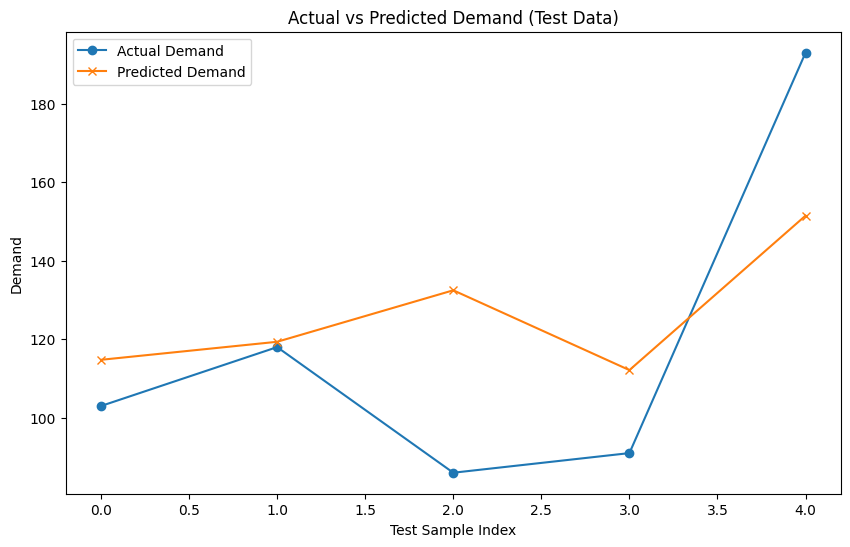

In [42]:
# Plot actual vs. predicted demand
plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual Demand', marker='o')
plt.plot(y_pred, label='Predicted Demand', marker='x')
plt.title('Actual vs Predicted Demand (Test Data)')
plt.xlabel('Test Sample Index')
plt.ylabel('Demand')
plt.legend()
plt.show()

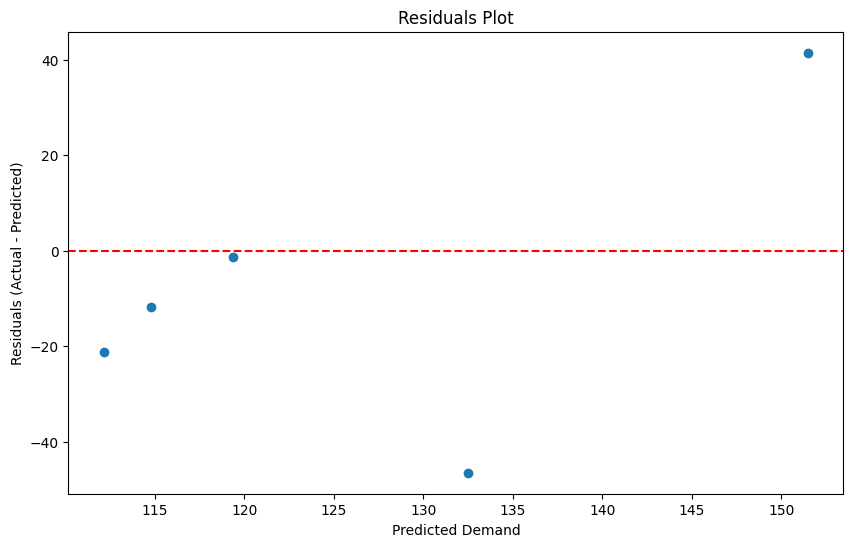

In [43]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Demand')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()
